In [1]:
import sys
print('python', sys.version)

import numpy as np
print('numpy', np.__version__)

import pandas as pd
print('pandas', pd.__version__)

import matplotlib as mpl
print('matplotlib', mpl.__version__)

import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic") # 한글표시 (window)
plt.rc("axes", unicode_minus=False) # x,y축 (-)부호 표시

# 레티나 디스플레이로 폰트가 선명하게 표시되도록 합니다.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

import seaborn as sns
print('seaborn', sns.__version__)

# import folium
import json

# 결과 확인을 용이하게 하기 위한 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# 모든 컬럼이 표시되도록 max_columns 의 수를 지정합니다.
pd.options.display.max_columns = 39

python 3.8.5 (default, May 27 2021, 13:30:53) 
[GCC 9.3.0]
numpy 1.19.5
pandas 1.2.5
matplotlib 3.4.2
seaborn 0.11.1


<ipython-input-1-e03686665c0d>:19: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


In [2]:
# import pandas as pd
print("pandas version: ", pd.__version__)
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

pandas version:  1.2.5


In [3]:
pd.options.display.max_rows = 500

## data load

In [4]:
# import pandas as pd


patient = pd.read_csv('../../data/MIMIC_III/PATIENTS.csv') #환자정보_입원환자만
# cpt = pd.read_csv('../data/MIMIC_III_data/CPTEVENTS.csv')
lab = pd.read_csv('../../data/MIMIC_III/LABEVENTS.csv') #외래환자포함
diagnoses_icd = pd.read_csv('../../data/MIMIC_III/DIAGNOSES_ICD.csv') #환자있음 #dis
diagnoses = pd.read_csv('../../data/MIMIC_III/D_ICD_DIAGNOSES.csv') #병이름 소개 #d_icd

In [5]:
diagnoses.head()
diagnoses_icd.head()
patient.head()
lab.head()

,ROW_ID,ICD9_CODE,SHORT_TITLE,LONG_TITLE
0,174,01166,TB pneumonia-oth test,"Tuberculous pneumonia [any form], tubercle bac..."
1,175,01170,TB pneumothorax-unspec,"Tuberculous pneumothorax, unspecified"
2,176,01171,TB pneumothorax-no exam,"Tuberculous pneumothorax, bacteriological or h..."
3,177,01172,TB pneumothorx-exam unkn,"Tuberculous pneumothorax, bacteriological or h..."
4,178,01173,TB pneumothorax-micro dx,"Tuberculous pneumothorax, tubercle bacilli fou..."


,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
4,1301,109,172335,5.0,4254


,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0


,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
0,281,3,NaN,50820,2101-10-12 16:07:00,7.39,7.39,units,NaN
1,282,3,NaN,50800,2101-10-12 18:17:00,ART,NaN,NaN,NaN
2,283,3,NaN,50802,2101-10-12 18:17:00,-1,-1.00,mEq/L,NaN
3,284,3,NaN,50804,2101-10-12 18:17:00,22,22.00,mEq/L,NaN
4,285,3,NaN,50808,2101-10-12 18:17:00,0.93,0.93,mmol/L,abnormal


## 폐렴 걸린 행 뽑기

In [6]:
diag_pneum = diagnoses[(diagnoses['SHORT_TITLE'].str.contains('pneum')|(diagnoses['SHORT_TITLE'].str.contains('Pneum')))]
len(diag_pneum)
diag_pneum

95

,ROW_ID,ICD9_CODE,SHORT_TITLE,LONG_TITLE
0,174,01166,TB pneumonia-oth test,"Tuberculous pneumonia [any form], tubercle bac..."
1,175,01170,TB pneumothorax-unspec,"Tuberculous pneumothorax, unspecified"
2,176,01171,TB pneumothorax-no exam,"Tuberculous pneumothorax, bacteriological or h..."
3,177,01172,TB pneumothorx-exam unkn,"Tuberculous pneumothorax, bacteriological or h..."
4,178,01173,TB pneumothorax-micro dx,"Tuberculous pneumothorax, tubercle bacilli fou..."
5,179,01174,TB pneumothorax-cult dx,"Tuberculous pneumothorax, tubercle bacilli not..."
6,180,01175,TB pneumothorax-histo dx,"Tuberculous pneumothorax, tubercle bacilli not..."
7,181,01176,TB pneumothorax-oth test,"Tuberculous pneumothorax, tubercle bacilli not..."
72,245,00322,Salmonella pneumonia,Salmonella pneumonia
283,168,01160,TB pneumonia-unspec,"Tuberculous pneumonia [any form], unspecified"


## 폐와 관련된 질병의 value_counts - 코드 486, 5070, 48241만 사용하기로 함
```
pneum 또는 Pneum이 속한 병에 걸린 사람들
ICD9 pneumonia 구글링하면 뉴모니아 관련 코드 나옴
```

In [7]:
pneum_id = diagnoses_icd[diagnoses_icd['ICD9_CODE'].isin(diag_pneum['ICD9_CODE'])].reset_index()
pneum_id['ICD9_CODE'].value_counts()[:10]

486      4839
5070     3680
48241     789
5121      786
99731     564
0413      473
4821      430
8600      375
48283     264
4829      227
Name: ICD9_CODE, dtype: int64

## [:3] 정확한 병명 확인

In [8]:
diagnoses[diagnoses['ICD9_CODE'].isin(pneum_id['ICD9_CODE'].value_counts()[:3].index)]

,ROW_ID,ICD9_CODE,SHORT_TITLE,LONG_TITLE
5129,5509,48241,Meth sus pneum d/t Staph,Methicillin susceptible pneumonia due to Staph...
5147,5528,486,"Pneumonia, organism NOS","Pneumonia, organism unspecified"
5407,5136,5070,Food/vomit pneumonitis,Pneumonitis due to inhalation of food or vomitus


In [9]:
pneum_id['SUBJECT_ID'].nunique()

10559

# 0622 flag가 abnormal
```
랩이벤트 flag abnormal인거
분포 abnormal 1개인거, 2개인거,,,, frequency 조사
itemid (검사) 유니크 개수
```

## [:3]의 Diagnoses_icd 데이터 추출

In [10]:
pneum_id

,index,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1,1298,109,172335,2.0,486
1,38,1498,114,178393,3.0,48283
2,57,1517,115,114585,16.0,0413
3,82,1542,117,164853,11.0,486
4,116,1576,124,112906,2.0,486
...,...,...,...,...,...,...
14154,650638,631748,95816,122432,3.0,486
14155,650672,632562,96004,141589,1.0,486
14156,650740,632630,96015,166722,2.0,4821
14157,650873,638381,97144,109999,9.0,4821


## 쓸데없는 줄 날리기

In [11]:
pneum = pneum_id[(pneum_id['ICD9_CODE'].isin(pneum_id['ICD9_CODE'].value_counts()[:3].index))].drop(['index','ROW_ID','SEQ_NUM'],axis=1).reset_index(drop=True)
pneum

,SUBJECT_ID,HADM_ID,ICD9_CODE
0,109,172335,486
1,117,164853,486
2,124,112906,486
3,124,138376,486
4,136,184644,486
...,...,...,...
9303,95555,103704,486
9304,95561,121289,486
9305,95816,122432,5070
9306,95816,122432,486


## 코드 3개 존재 확인

In [12]:
pneum['ICD9_CODE'].value_counts()

486      4839
5070     3680
48241     789
Name: ICD9_CODE, dtype: int64

In [13]:
환자id = pneum['SUBJECT_ID'].unique()
len(환자id)

7807

In [14]:
# 추출한 환자id로 환자의 사망,생존 확인
patient[patient['SUBJECT_ID'].isin(환자id)]['EXPIRE_FLAG'].value_counts()

1    4777
0    3030
Name: EXPIRE_FLAG, dtype: int64

## patient에서 pneum 상위 3개 걸린 환자만 뽑기

In [15]:
환자 = patient[patient['SUBJECT_ID'].isin(환자id)]
환자

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0
17,251,268,F,2132-02-21 00:00:00,2198-02-18 00:00:00,2198-02-18 00:00:00,NaN,1
18,252,269,M,2130-09-30 00:00:00,NaN,NaN,NaN,0
22,628,665,M,2052-05-20 00:00:00,2120-02-04 00:00:00,2120-02-04 00:00:00,NaN,1
...,...,...,...,...,...,...,...,...
46476,31801,43932,M,2080-06-26 00:00:00,2153-03-01 00:00:00,NaN,2153-03-01 00:00:00,1
46477,31802,43937,M,2113-03-30 00:00:00,2200-08-05 00:00:00,2200-08-05 00:00:00,2200-08-05 00:00:00,1
46482,31807,43959,F,2028-05-13 00:00:00,NaN,NaN,NaN,0
46488,31813,43982,F,2065-04-17 00:00:00,NaN,NaN,NaN,0


## lab에서 pneum 상위 3개 걸린 환자만 뽑기

In [16]:
환자lab = lab[lab['SUBJECT_ID'].isin(환자id)].reset_index(drop=True)
환자lab

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
0,5144,9,150750.0,50819,2149-11-14 06:07:00,5,5.00,NaN,NaN
1,5145,9,150750.0,50820,2149-11-14 06:07:00,7.41,7.41,units,NaN
2,5146,9,150750.0,50821,2149-11-14 06:07:00,161,161.00,mm Hg,abnormal
3,5147,9,150750.0,50826,2149-11-14 06:07:00,600,600.00,NaN,NaN
4,5148,9,150750.0,50827,2149-11-14 06:07:00,17/,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9356344,27427231,96442,120151.0,51248,2115-06-29 04:45:00,29.1,29.10,pg,NaN
9356345,27427232,96442,120151.0,51249,2115-06-29 04:45:00,32.6,32.60,%,NaN
9356346,27427233,96442,120151.0,51250,2115-06-29 04:45:00,89,89.00,fL,NaN
9356347,27427234,96442,120151.0,51254,2115-06-29 04:45:00,1.6,1.60,%,abnormal


In [17]:
환자lab['SUBJECT_ID'].nunique()
환자lab['ITEMID'].nunique()

7799

690

In [18]:
환자lab['FLAG'] = 환자lab['FLAG'].fillna('nan') #nan 개수 셀려고
환자lab['FLAG'].value_counts()

nan         5931403
abnormal    3406609
delta         18337
Name: FLAG, dtype: int64

## abnormal인 것만 뽑음

In [19]:
ab_pneu = 환자lab[환자lab['FLAG'].str.contains('abnormal')]
ab_pneu

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
2,5146,9,150750.0,50821,2149-11-14 06:07:00,161,161.0,mm Hg,abnormal
6,5150,9,150750.0,50910,2149-11-14 07:47:00,1319,1319.0,IU/L,abnormal
7,5151,9,150750.0,50911,2149-11-14 07:47:00,12,12.0,ng/mL,abnormal
8,5152,9,150750.0,50964,2149-11-14 07:47:00,320,320.0,mOsm/kg,abnormal
19,5163,9,150750.0,50821,2149-11-14 09:36:00,381,381.0,mm Hg,abnormal
...,...,...,...,...,...,...,...,...,...
9356341,27427228,96442,120151.0,51221,2115-06-29 04:45:00,29.0,29.0,%,abnormal
9356342,27427229,96442,120151.0,51222,2115-06-29 04:45:00,9.5,9.5,g/dL,abnormal
9356343,27427230,96442,120151.0,51244,2115-06-29 04:45:00,3.2,3.2,%,abnormal
9356347,27427234,96442,120151.0,51254,2115-06-29 04:45:00,1.6,1.6,%,abnormal


## ab_pneu에서 ITEMID nunique()

In [20]:
ab_pneu['ITEMID'].nunique()

288

## 환자 lab에서 flag 빈도수 분포

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FLAG', ylabel='count'>

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


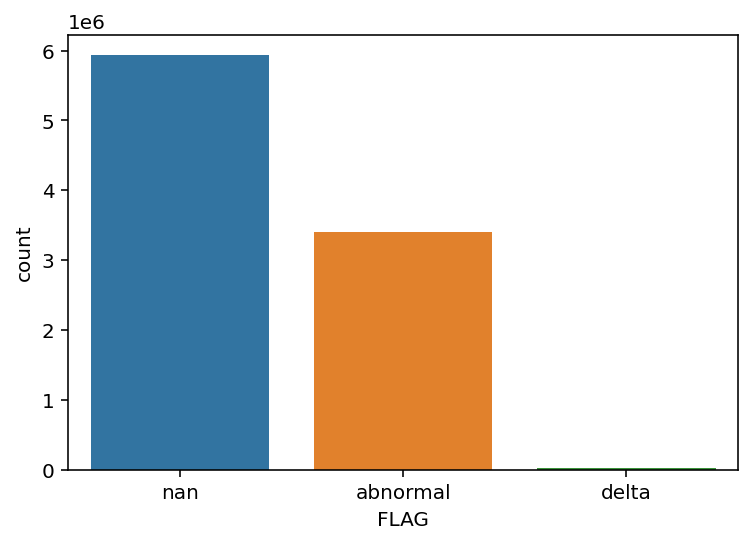

In [21]:
sns.countplot(환자lab['FLAG'])

In [22]:
plt.figure(figsize=(100,25), dpi=100)
sns.countplot(ab_pneu['ITEMID'])#, rotation = - 45)

plt.xticks(rotation = - 45 )

<Figure size 10000x2500 with 0 Axes>

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ITEMID', ylabel='count'>

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [23]:
ab_pneu['ITEMID']
ab_pneu['ITEMID'].value_counts()[:10]

2          50821
6          50910
7          50911
8          50964
19         50821
           ...  
9356341    51221
9356342    51222
9356343    51244
9356347    51254
9356348    51256
Name: ITEMID, Length: 3406609, dtype: int64

51221    258638
51279    229334
51222    228221
50931    180424
51006    169388
51277    131579
50912    123311
51274    113207
51301    112910
50821    110598
Name: ITEMID, dtype: int64

# 0629

In [24]:
need = ab_pneu[['SUBJECT_ID', 'ITEMID', 'FLAG']]
need.replace('abnormal', 1, inplace=True) #inplace = True를 하지 않으면 (저장?) 유지가 안됨.)
# need.replace()
need.reset_index(drop=True, inplace = True) #index 재정비 및 정렬 (오름차순) 및 저장
need

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,SUBJECT_ID,ITEMID,FLAG
0,9,50821,1
1,9,50910,1
2,9,50911,1
3,9,50964,1
4,9,50821,1
...,...,...,...
3406604,96442,51221,1
3406605,96442,51222,1
3406606,96442,51244,1
3406607,96442,51254,1


need['ITEMID'] == 50910

In [25]:
len(need)

3406609

In [26]:
need

,SUBJECT_ID,ITEMID,FLAG
0,9,50821,1
1,9,50910,1
2,9,50911,1
3,9,50964,1
4,9,50821,1
...,...,...,...
3406604,96442,51221,1
3406605,96442,51222,1
3406606,96442,51244,1
3406607,96442,51254,1


In [27]:
# need 확인하고 싶었음.
# need.to_csv("need.csv")

In [28]:
need['ITEMID'].nunique()

288

In [29]:
need['ITEMID'].unique()

array([50821, 50910, 50911, 50964, 50882, 50931, 50971, 51275, 51288,
       50809, 50818, 50822, 50808, 50813, 50905, 50907, 50912, 50820,
       51221, 51222, 51279, 51301, 51493, 51274, 50954, 50970, 51006,
       50862, 50983, 50893, 50960, 51277, 50868, 50952, 51244, 51256,
       50908, 51003, 50811, 50861, 50878, 50804, 51248, 51249, 51265,
       51516, 51250, 51237, 50902, 51143, 51232, 51255, 50863, 51000,
       51009, 50909, 51251, 50900, 50824, 50889, 51018, 51362, 51214,
       51070, 51514, 50963, 51200, 51144, 50806, 51254, 50945, 50924,
       51283, 50867, 50956, 51218, 51269, 50935, 51130, 51131, 51132,
       51181, 50953, 50998, 50950, 51482, 50852, 51148, 51257, 50885,
       51427, 50883, 51213, 51099, 51196, 50917, 51284, 51245, 51479,
       51491, 50965, 51146, 50949, 50951, 51010, 51431, 51434, 51436,
       51002, 50803, 50890, 50891, 51001, 51116, 51117, 51118, 51123,
       51125, 51127, 51128, 51438, 51439, 50976, 51007, 51383, 51384,
       51120, 50915,

# 0630

In [30]:
col = need['ITEMID'].unique()
row = need['SUBJECT_ID'].unique()

In [31]:
df = pd.DataFrame(columns = col, index = row)
# df[col]
df

,50821,50910,50911,50964,50882,50931,50971,51275,51288,50809,50818,50822,50808,50813,50905,50907,50912,50820,51221,51222,51279,51301,51493,51274,50954,50970,51006,50862,50983,50893,50960,51277,50868,50952,51244,51256,50908,51003,50811,50861,50878,50804,51248,51249,51265,51516,51250,51237,50902,51143,...,51517,50921,50895,51005,50916,50925,51348,51225,51380,51139,51272,51273,51459,51432,51376,51202,51203,51205,51379,50853,50894,51122,51298,51289,51210,50992,51136,51526,51449,51467,51208,50948,50858,51456,51253,50871,51119,51280,50865,51435,50872,51430,50913,51443,50876,51209,51121,51437,51224,51375
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [32]:
df.index #row 아니고 index
df.columns

Int64Index([    9,    21,    36,    31,    41,    37,    68,    94,    85,
              109,
            ...
            98864, 98853, 98829, 99052, 99008, 98797, 98833, 98878, 99205,
            99063],
           dtype='int64', length=7799)

Int64Index([50821, 50910, 50911, 50964, 50882, 50931, 50971, 51275, 51288,
            50809,
            ...
            50872, 51430, 50913, 51443, 50876, 51209, 51121, 51437, 51224,
            51375],
           dtype='int64', length=288)

In [33]:
(need['SUBJECT_ID'] == 9).sum()
# need['ITEMID'] == 50821

113

In [34]:
#중복을 제거해서 for문을 돌릴 수 있으면 좋을 것 같다.
for idx in range(len(need)):
    for i,j in zip(df.index, df.columns):
#         idx,i,j
        if need['SUBJECT_ID'][idx] == i and need['ITEMID'][idx] == j:
#             "################",idx
#             i,j
            df[i,j] = 1

In [91]:
df

""
9
21
36
31
41
...
98797
98833
98878
99205


In [36]:
# df.to_csv("0629과제.csv")

In [37]:
df.sum() # 열끼리의 합을 통해 1이 1개도 없는 열 확인

50821    7799
50910    7799
50911       0
50964       0
50882       0
50931    7799
50971    7799
51275    7799
51288       0
50809    7799
50818       0
50822       0
50808    7799
50813    7799
50905    7799
50907       0
50912    7799
50820       0
51221    7799
51222    7799
51279    7799
51301    7799
51493    7799
51274    7799
50954       0
50970    7799
51006    7799
50862    7799
50983       0
50893    7799
50960       0
51277       0
50868       0
50952       0
51244    7799
51256    7799
50908    7799
51003       0
50811    7799
50861    7799
50878       0
50804    7799
51248    7799
51249    7799
51265    7799
51516    7799
51250       0
51237       0
50902    7799
51143       0
51232       0
51255       0
50863       0
51000       0
51009       0
50909       0
51251       0
50900       0
50824       0
50889       0
51018       0
51362       0
51214       0
51070       0
51514       0
50963       0
51200       0
51144       0
50806    7799
51254       0
50945       0
50924 

In [64]:
col = df.sum() == 0
idx = col.index
lst = list(idx)

In [66]:
# df.drop(columns = lst, axis = 1)

""
9
21
36
31
41
...
98797
98833
98878
99205


In [116]:
df = pd.read_csv(r"0629과제.csv")

In [117]:
df_copy = df.copy()
# df_copy.drop(columns = 50911, inplace=True)

In [118]:
df
df_copy
df_copy[['50911']].sum()

,Unnamed: 0,50821,50910,50911,50964,50882,50931,50971,51275,51288,50809,50818,50822,50808,50813,50905,50907,50912,50820,51221,51222,51279,51301,51493,51274,50954,50970,51006,50862,50983,50893,50960,51277,50868,50952,51244,51256,50908,51003,50811,50861,50878,50804,51248,51249,51265,51516,51250,51237,50902,...,51517,50921,50895,51005,50916,50925,51348,51225,51380,51139,51272,51273,51459,51432,51376,51202,51203,51205,51379,50853,50894,51122,51298,51289,51210,50992,51136,51526,51449,51467,51208,50948,50858,51456,51253,50871,51119,51280,50865,51435,50872,51430,50913,51443,50876,51209,51121,51437,51224,51375
0,9,1,1,NaN,NaN,NaN,1,1,1,NaN,1,NaN,NaN,1,1,1,NaN,1,NaN,1,1,1,1,1,1,NaN,1,1,1,NaN,1,NaN,NaN,NaN,NaN,1,1,1,NaN,1,1,NaN,1,1,1,1,1,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21,1,1,NaN,NaN,NaN,1,1,1,NaN,1,NaN,NaN,1,1,1,NaN,1,NaN,1,1,1,1,1,1,NaN,1,1,1,NaN,1,NaN,NaN,NaN,NaN,1,1,1,NaN,1,1,NaN,1,1,1,1,1,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,36,1,1,NaN,NaN,NaN,1,1,1,NaN,1,NaN,NaN,1,1,1,NaN,1,NaN,1,1,1,1,1,1,NaN,1,1,1,NaN,1,NaN,NaN,NaN,NaN,1,1,1,NaN,1,1,NaN,1,1,1,1,1,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31,1,1,NaN,NaN,NaN,1,1,1,NaN,1,NaN,NaN,1,1,1,NaN,1,NaN,1,1,1,1,1,1,NaN,1,1,1,NaN,1,NaN,NaN,NaN,NaN,1,1,1,NaN,1,1,NaN,1,1,1,1,1,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,41,1,1,NaN,NaN,NaN,1,1,1,NaN,1,NaN,NaN,1,1,1,NaN,1,NaN,1,1,1,1,1,1,NaN,1,1,1,NaN,1,NaN,NaN,NaN,NaN,1,1,1,NaN,1,1,NaN,1,1,1,1,1,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7794,98797,1,1,NaN,NaN,NaN,1,1,1,NaN,1,NaN,NaN,1,1,1,NaN,1,NaN,1,1,1,1,1,1,NaN,1,1,1,NaN,1,NaN,NaN,NaN,NaN,1,1,1,NaN,1,1,NaN,1,1,1,1,1,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7795,98833,1,1,NaN,NaN,NaN,1,1,1,NaN,1,NaN,NaN,1,1,1,NaN,1,NaN,1,1,1,1,1,1,NaN,1,1,1,NaN,1,NaN,NaN,NaN,NaN,1,1,1,NaN,1,1,NaN,1,1,1,1,1,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7796,98878,1,1,NaN,NaN,NaN,1,1,1,NaN,1,NaN,NaN,1,1,1,NaN,1,NaN,1,1,1,1,1,1,NaN,1,1,1,NaN,1,NaN,NaN,NaN,NaN,1,1,1,NaN,1,1,NaN,1,1,1,1,1,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7797,99205,1,1,NaN,NaN,NaN,1,1,1,NaN,1,NaN,NaN,1,1,1,NaN,1,NaN,1,1,1,1,1,1,NaN,1,1,1,NaN,1,NaN,NaN,NaN,NaN,1,1,1,NaN,1,1,NaN,1,1,1,1,1,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

,Unnamed: 0,50821,50910,50911,50964,50882,50931,50971,51275,51288,50809,50818,50822,50808,50813,50905,50907,50912,50820,51221,51222,51279,51301,51493,51274,50954,50970,51006,50862,50983,50893,50960,51277,50868,50952,51244,51256,50908,51003,50811,50861,50878,50804,51248,51249,51265,51516,51250,51237,50902,...,51517,50921,50895,51005,50916,50925,51348,51225,51380,51139,51272,51273,51459,51432,51376,51202,51203,51205,51379,50853,50894,51122,51298,51289,51210,50992,51136,51526,51449,51467,51208,50948,50858,51456,51253,50871,51119,51280,50865,51435,50872,51430,50913,51443,50876,51209,51121,51437,51224,51375
0,9,1,1,NaN,NaN,NaN,1,1,1,NaN,1,NaN,NaN,1,1,1,NaN,1,NaN,1,1,1,1,1,1,NaN,1,1,1,NaN,1,NaN,NaN,NaN,NaN,1,1,1,NaN,1,1,NaN,1,1,1,1,1,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21,1,1,NaN,NaN,NaN,1,1,1,NaN,1,NaN,NaN,1,1,1,NaN,1,NaN,1,1,1,1,1,1,NaN,1,1,1,NaN,1,NaN,NaN,NaN,NaN,1,1,1,NaN,1,1,NaN,1,1,1,1,1,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,36,1,1,NaN,NaN,NaN,1,1,1,NaN,1,NaN,NaN,1,1,1,NaN,1,NaN,1,1,1,1,1,1,NaN,1,1,1,NaN,1,NaN,NaN,NaN,NaN,1,1,1,NaN,1,1,NaN,1,1,1,1,1,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31,1,1,NaN,NaN,NaN,1,1,1,NaN,1,NaN,NaN,1,1,1,NaN,1,NaN,1,1,1,1,1,1,NaN,1,1,1,NaN,1,NaN,NaN,NaN,NaN,1,1,1,NaN,1,1,NaN,1,1,1,1,1,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,41,1,1,NaN,NaN,NaN,1,1,1,NaN,1,NaN,NaN,1,1,1,NaN,1,NaN,1,1,1,1,1,1,NaN,1,1,1,NaN,1,NaN,NaN,NaN,NaN,1,1,1,NaN,1,1,NaN,1,1,1,1,1,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7794,98797,1,1,NaN,NaN,NaN,1,1,1,NaN,1,NaN,NaN,1,1,1,NaN,1,NaN,1,1,1,1,1,1,NaN,1,1,1,NaN,1,NaN,NaN,NaN,NaN,1,1,1,NaN,1,1,NaN,1,1,1,1,1,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7795,98833,1,1,NaN,NaN,NaN,1,1,1,NaN,1,NaN,NaN,1,1,1,NaN,1,NaN,1,1,1,1,1,1,NaN,1,1,1,NaN,1,NaN,NaN,NaN,NaN,1,1,1,NaN,1,1,NaN,1,1,1,1,1,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7796,98878,1,1,NaN,NaN,NaN,1,1,1,NaN,1,NaN,NaN,1,1,1,NaN,1,NaN,1,1,1,1,1,1,NaN,1,1,1,NaN,1,NaN,NaN,NaN,NaN,1,1,1,NaN,1,1,NaN,1,1,1,1,1,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7797,99205,1,1,NaN,NaN,NaN,1,1,1,NaN,1,NaN,NaN,1,1,1,NaN,1,NaN,1,1,1,1,1,1,NaN,1,1,1,NaN,1,NaN,NaN,NaN,NaN,1,1,1,NaN,1,1,NaN,1,1,1,1,1,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

50911    0.0
dtype: float64

In [119]:
for i in lst:
    if df_copy[str(i)].sum() == 0:
        
        df_copy.drop(columns = str(i), axis = 1, inplace = True)

In [121]:
df
df_copy

,Unnamed: 0,50821,50910,50911,50964,50882,50931,50971,51275,51288,50809,50818,50822,50808,50813,50905,50907,50912,50820,51221,51222,51279,51301,51493,51274,50954,50970,51006,50862,50983,50893,50960,51277,50868,50952,51244,51256,50908,51003,50811,50861,50878,50804,51248,51249,51265,51516,51250,51237,50902,...,51517,50921,50895,51005,50916,50925,51348,51225,51380,51139,51272,51273,51459,51432,51376,51202,51203,51205,51379,50853,50894,51122,51298,51289,51210,50992,51136,51526,51449,51467,51208,50948,50858,51456,51253,50871,51119,51280,50865,51435,50872,51430,50913,51443,50876,51209,51121,51437,51224,51375
0,9,1,1,NaN,NaN,NaN,1,1,1,NaN,1,NaN,NaN,1,1,1,NaN,1,NaN,1,1,1,1,1,1,NaN,1,1,1,NaN,1,NaN,NaN,NaN,NaN,1,1,1,NaN,1,1,NaN,1,1,1,1,1,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21,1,1,NaN,NaN,NaN,1,1,1,NaN,1,NaN,NaN,1,1,1,NaN,1,NaN,1,1,1,1,1,1,NaN,1,1,1,NaN,1,NaN,NaN,NaN,NaN,1,1,1,NaN,1,1,NaN,1,1,1,1,1,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,36,1,1,NaN,NaN,NaN,1,1,1,NaN,1,NaN,NaN,1,1,1,NaN,1,NaN,1,1,1,1,1,1,NaN,1,1,1,NaN,1,NaN,NaN,NaN,NaN,1,1,1,NaN,1,1,NaN,1,1,1,1,1,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31,1,1,NaN,NaN,NaN,1,1,1,NaN,1,NaN,NaN,1,1,1,NaN,1,NaN,1,1,1,1,1,1,NaN,1,1,1,NaN,1,NaN,NaN,NaN,NaN,1,1,1,NaN,1,1,NaN,1,1,1,1,1,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,41,1,1,NaN,NaN,NaN,1,1,1,NaN,1,NaN,NaN,1,1,1,NaN,1,NaN,1,1,1,1,1,1,NaN,1,1,1,NaN,1,NaN,NaN,NaN,NaN,1,1,1,NaN,1,1,NaN,1,1,1,1,1,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7794,98797,1,1,NaN,NaN,NaN,1,1,1,NaN,1,NaN,NaN,1,1,1,NaN,1,NaN,1,1,1,1,1,1,NaN,1,1,1,NaN,1,NaN,NaN,NaN,NaN,1,1,1,NaN,1,1,NaN,1,1,1,1,1,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7795,98833,1,1,NaN,NaN,NaN,1,1,1,NaN,1,NaN,NaN,1,1,1,NaN,1,NaN,1,1,1,1,1,1,NaN,1,1,1,NaN,1,NaN,NaN,NaN,NaN,1,1,1,NaN,1,1,NaN,1,1,1,1,1,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7796,98878,1,1,NaN,NaN,NaN,1,1,1,NaN,1,NaN,NaN,1,1,1,NaN,1,NaN,1,1,1,1,1,1,NaN,1,1,1,NaN,1,NaN,NaN,NaN,NaN,1,1,1,NaN,1,1,NaN,1,1,1,1,1,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7797,99205,1,1,NaN,NaN,NaN,1,1,1,NaN,1,NaN,NaN,1,1,1,NaN,1,NaN,1,1,1,1,1,1,NaN,1,1,1,NaN,1,NaN,NaN,NaN,NaN,1,1,1,NaN,1,1,NaN,1,1,1,1,1,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

,Unnamed: 0,50821,50910,50931,50971,51275,50809,50808,50813,50905,50912,51221,51222,51279,51301,51493,51274,50970,51006,50862,50893,51244,51256,50908,50811,50861,50804,51248,51249,51265,51516,50902,50806,50867,50953,51213,51146,51431,51428,50927
0,9,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,21,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,36,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,31,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,41,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7794,98797,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7795,98833,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7796,98878,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7797,99205,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [122]:
# df_copy.to_csv("0629과제 최종.csv")

In [65]:
need['FLAG']

2          1
6          1
7          1
8          1
19         1
          ..
9356341    1
9356342    1
9356343    1
9356347    1
9356348    1
Name: FLAG, Length: 3406609, dtype: int64

## 드디어 똑같아짐 #이 아래는 내가 따로 한 거라서 볼 필요가 없음.

In [22]:
lab_abn = lab[lab['FLAG'].isin(['abnormal'])] #abnormal만 넣어둠
lab_abn

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
4,285,3,NaN,50808,2101-10-12 18:17:00,0.93,0.93,mmol/L,abnormal
15,296,3,NaN,50912,2101-10-13 03:00:00,1.7,1.70,mg/dL,abnormal
16,297,3,NaN,50931,2101-10-13 03:00:00,137,137.00,mg/dL,abnormal
21,302,3,NaN,51006,2101-10-13 03:00:00,33,33.00,mg/dL,abnormal
22,303,3,NaN,51009,2101-10-13 03:00:00,16.8,16.80,ug/mL,abnormal
...,...,...,...,...,...,...,...,...,...
27854045,27428430,96443,103219.0,50862,2109-12-30 01:40:00,2.2,2.20,g/dL,abnormal
27854046,27428431,96443,103219.0,50863,2109-12-30 01:40:00,172,172.00,IU/L,abnormal
27854049,27428434,96443,103219.0,50878,2109-12-30 01:40:00,467,467.00,IU/L,abnormal
27854051,27428436,96443,103219.0,50885,2109-12-30 01:40:00,2.1,2.10,mg/dL,abnormal


In [25]:
lab_abn[lab_abn['SUBJECT_ID'].isin(환자id)].reset_index(drop=True)

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
0,5146,9,150750.0,50821,2149-11-14 06:07:00,161,161.0,mm Hg,abnormal
1,5150,9,150750.0,50910,2149-11-14 07:47:00,1319,1319.0,IU/L,abnormal
2,5151,9,150750.0,50911,2149-11-14 07:47:00,12,12.0,ng/mL,abnormal
3,5152,9,150750.0,50964,2149-11-14 07:47:00,320,320.0,mOsm/kg,abnormal
4,5163,9,150750.0,50821,2149-11-14 09:36:00,381,381.0,mm Hg,abnormal
...,...,...,...,...,...,...,...,...,...
3406604,27427228,96442,120151.0,51221,2115-06-29 04:45:00,29.0,29.0,%,abnormal
3406605,27427229,96442,120151.0,51222,2115-06-29 04:45:00,9.5,9.5,g/dL,abnormal
3406606,27427230,96442,120151.0,51244,2115-06-29 04:45:00,3.2,3.2,%,abnormal
3406607,27427234,96442,120151.0,51254,2115-06-29 04:45:00,1.6,1.6,%,abnormal


In [29]:
labev_abn = lab[lab['FLAG'].isin(['abnormal'])]
labev_abn

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
4,285,3,NaN,50808,2101-10-12 18:17:00,0.93,0.93,mmol/L,abnormal
15,296,3,NaN,50912,2101-10-13 03:00:00,1.7,1.70,mg/dL,abnormal
16,297,3,NaN,50931,2101-10-13 03:00:00,137,137.00,mg/dL,abnormal
21,302,3,NaN,51006,2101-10-13 03:00:00,33,33.00,mg/dL,abnormal
22,303,3,NaN,51009,2101-10-13 03:00:00,16.8,16.80,ug/mL,abnormal
...,...,...,...,...,...,...,...,...,...
27854045,27428430,96443,103219.0,50862,2109-12-30 01:40:00,2.2,2.20,g/dL,abnormal
27854046,27428431,96443,103219.0,50863,2109-12-30 01:40:00,172,172.00,IU/L,abnormal
27854049,27428434,96443,103219.0,50878,2109-12-30 01:40:00,467,467.00,IU/L,abnormal
27854051,27428436,96443,103219.0,50885,2109-12-30 01:40:00,2.1,2.10,mg/dL,abnormal


In [39]:
labev_abn[labev_abn['SUBJECT_ID'].isin(pneum_id['SUBJECT_ID'])]

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
876,2296,4,NaN,50878,2191-04-22 16:15:00,105,105.0,IU/L,abnormal
882,2302,4,NaN,50971,2191-04-22 16:15:00,3.2,3.2,mEq/L,abnormal
889,2309,4,NaN,51200,2191-04-22 16:15:00,6,6.0,%,abnormal
890,2310,4,NaN,51221,2191-04-22 16:15:00,28.6,28.6,%,abnormal
891,2311,4,NaN,51222,2191-04-22 16:15:00,8.8,8.8,g/dL,abnormal
...,...,...,...,...,...,...,...,...,...
27854045,27428430,96443,103219.0,50862,2109-12-30 01:40:00,2.2,2.2,g/dL,abnormal
27854046,27428431,96443,103219.0,50863,2109-12-30 01:40:00,172,172.0,IU/L,abnormal
27854049,27428434,96443,103219.0,50878,2109-12-30 01:40:00,467,467.0,IU/L,abnormal
27854051,27428436,96443,103219.0,50885,2109-12-30 01:40:00,2.1,2.1,mg/dL,abnormal


In [33]:
labev.loc[labev['ROW_ID']== dis2['ROW_ID']]

ValueError: Can only compare identically-labeled Series objects

In [37]:
# labev['ROW_ID']==
dis2['ROW_ID'] 
labev_abn['ROW_ID']



1           1298
38          1498
57          1517
82          1542
116         1576
           ...  
650638    631748
650672    632562
650740    632630
650873    638381
651005    639761
Name: ROW_ID, Length: 14159, dtype: int64

4                285
15               296
16               297
21               302
22               303
              ...   
27854045    27428430
27854046    27428431
27854049    27428434
27854051    27428436
27854054    27428439
Name: ROW_ID, Length: 9779594, dtype: int64